<a href="https://colab.research.google.com/github/easycastle/data-science-basic/blob/main/MontyHall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

doors = ['Car', 'Goat 1', 'Goat 2']
goats = ['Goat 1', 'Goat 2']

In [ ]:
def other_one(x, a_b):
  if x == a_b[0]:
    return a_b[1]
  elif x == a_b[1]:
    return a_b[0]
  else:
    return 'Input Not Valid'

In [ ]:
original = 'Goat 1'
outcome = [original, other_one(original, goats), 'Car']
outcome

['Goat 1', 'Goat 2', 'Car']

In [ ]:
original = 'Goat 2'
outcome = [original, other_one(original, goats), 'Car']
outcome

['Goat 2', 'Goat 1', 'Car']

In [ ]:
original = 'Car'
throw_out = np.random.choice(goats)
outcome = [original, throw_out, other_one(throw_out, goats)]
outcome

['Car', 'Goat 1', 'Goat 2']

In [ ]:
"""
  Check whether the name of a door (a string) is a Goat.
  Examples:
  =========
  >>> is_goat('Goat 1')
  True
  >>> is_goat('Goat 2')
  True
  >>> is_goat('Car')
  False
"""

def is_goat(door_name):
  if door_name == "Goat 1":
    return True
  elif door_name == "Goat 2":
    return True
  else:
    return False


"""
  Play the Monty Hall game once
  and return an array of three strings:
  original choice, what Monty throws out, what remains
"""

def monty_hall():
  original = np.random.choice(doors)
  if is_goat(original):
    return [original, other_one(original, goats),'Car']
  else:
    throw_out = np.random.choice(goats)
  return [original, throw_out, other_one(throw_out, goats)]



In [ ]:
is_goat('Goat 1')

True

In [ ]:
is_goat('Goat 2')

True

In [ ]:
monty_hall()

['Goat 1', 'Goat 2', 'Car']

In [ ]:
# Number of times we'll play the game
N = 10000

original = []
throw_out = []
remains = []

for i in np.arange(N):
  result = monty_hall() # the result of one game
  # Collect the results in the appropriate arrays
  original = np.append(original, result[0])
  throw_out = np.append(throw_out, result[1])
  remains = np.append(remains, result[2])
# The for-loop is done! Now put all the arrays together in a # table.


df = pd.DataFrame({
    '<Original Door Choice>': original,
    '<Monty Throws Out>': throw_out,
    '<Remaining Door>': remains
})
print(df)

     <Original Door Choice> <Monty Throws Out> <Remaining Door>
0                    Goat 1             Goat 2              Car
1                    Goat 2             Goat 1              Car
2                    Goat 1             Goat 2              Car
3                       Car             Goat 2           Goat 1
4                    Goat 2             Goat 1              Car
...                     ...                ...              ...
9995                    Car             Goat 2           Goat 1
9996                 Goat 2             Goat 1              Car
9997                 Goat 1             Goat 2              Car
9998                    Car             Goat 1           Goat 2
9999                 Goat 1             Goat 2              Car

[10000 rows x 3 columns]


In [ ]:
df.head(20)

,<Original Door Choice>,<Monty Throws Out>,<Remaining Door>
0,Goat 1,Goat 2,Car
1,Goat 2,Goat 1,Car
2,Goat 1,Goat 2,Car
3,Car,Goat 2,Goat 1
4,Goat 2,Goat 1,Car
5,Car,Goat 1,Goat 2
6,Goat 2,Goat 1,Car
7,Goat 1,Goat 2,Car
8,Goat 2,Goat 1,Car
9,Car,Goat 2,Goat 1


In [ ]:
rst = df['<Original Door Choice>'].unique()
rst

array(['Goat 1', 'Goat 2', 'Car'], dtype=object)

In [ ]:
results_o = df['<Original Door Choice>'].value_counts()
results_o

Goat 2    3388
Goat 1    3361
Car       3251
Name: <Original Door Choice>, dtype: int64

In [ ]:
results_r = df['<Remaining Door>'].value_counts()
print(results_r)

Car       6749
Goat 1    1628
Goat 2    1623
Name: <Remaining Door>, dtype: int64


In [ ]:
pd.DataFrame(results_r)

,<Remaining Door>
Car,6749
Goat 1,1628
Goat 2,1623


In [ ]:
results_r

Car       6749
Goat 1    1628
Goat 2    1623
Name: <Remaining Door>, dtype: int64

In [ ]:
df = pd.concat([results_o, results_r], axis=1)

In [ ]:
df

,<Original Door Choice>,<Remaining Door>
Goat 2,3388,1623
Goat 1,3361,1628
Car,3251,6749


In [ ]:
df['<Original Door Choice>']

Goat 2    3388
Goat 1    3361
Car       3251
Name: <Original Door Choice>, dtype: int64

In [ ]:
df['<Remaining Door>']

Goat 2    1623
Goat 1    1628
Car       6749
Name: <Remaining Door>, dtype: int64

In [ ]:
x = np.arange(3)
x

array([0, 1, 2])

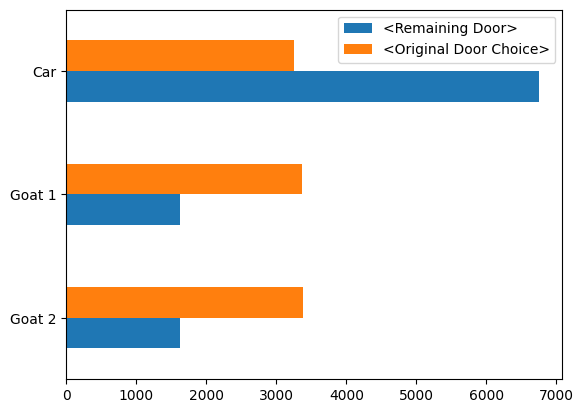

In [ ]:
_df = pd.DataFrame(df,columns=['<Remaining Door>', '<Original Door Choice>'], index = ['Goat 2', 'Goat 1', 'Car'])
# Multiple horizontal bar chart
_df.plot.barh()

# Display the plot
plt.show()

그래프를 그릴때는 아래 코드를 참고해서 그려보자!!

<BarContainer object of 3 artists>

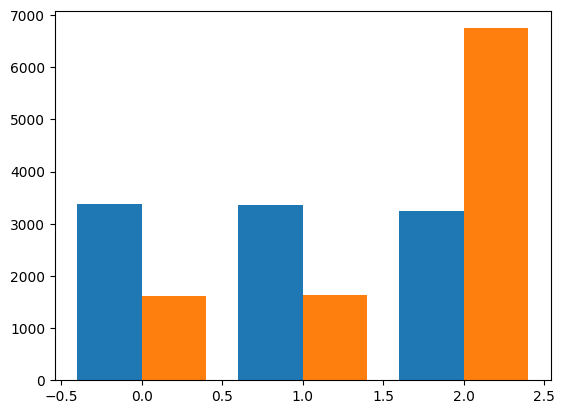

In [ ]:
x = np.arange(3)
width = 0.40

# plot data in grouped manner of bar type
plt.bar(x-0.2, df['<Original Door Choice>'], width)
plt.bar(x+0.2, df['<Remaining Door>'], width)

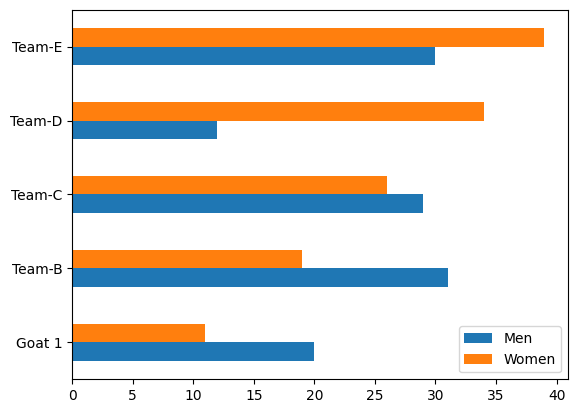

In [ ]:
# Library Import(numpy and matplotlib)
import matplotlib.pyplot as plot
import pandas as pd
# Make a data definition
_data = {'Women': [11, 19, 26, 34, 39],
        'Men': [20, 31, 29, 12, 30]}
_df1 = pd.DataFrame(_data,columns=['Men', 'Women'], index = ['Goat 1', 'Team-B', 'Team-C', 'Team-D', 'Team-E'])

# Multiple horizontal bar chart
_df1.plot.barh()

# Display the plot
plot.show()